<a href="https://colab.research.google.com/github/RicardoMourao-py/INFORMACOES_GEORREFERENCIADAS/blob/main/projeto_infogeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando bibliotecas

In [1]:
!pip install geopandas --quiet
!pip install geopy --quiet
!pip install pointpats==2.3.0 --quiet
!pip install fiona --quiet
!pip install seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 62.3 MB/s eta 0:00:00


## Importando Bibliotecas

In [2]:
import geopandas as gpd
import fiona as f
from pointpats import PointPattern
import matplotlib.pyplot as plt
import os
import numpy as np
from pointpats.centrography import mean_center, weighted_mean_center, std_distance, ellipse
from matplotlib.patches import Ellipse
from pointpats import hull
import pointpats.quadrat_statistics as qs
import seaborn as sns
import math
from pointpats.distance_statistics import K
from pointpats import PoissonPointProcess
import itertools
from pointpats.distance_statistics import Kenv
from google.colab import files

In [24]:
equip_esporte_clube = gpd.read_file("SIRGAS_GPKG_TEMA_ESPORTE_CLUBE.gpkg")
equip_esporte_clube_comunidade = gpd.read_file("SIRGAS_GPKG_TEMA_ESPORTE_CLUBE DA COMUNIDADE.gpkg")
equip_esporte_centro_esportivo = gpd.read_file("SIRGAS_GPKG_TEMA_ESPORTE_CENTRO ESPORTIVO.gpkg")

In [29]:
equip_esporte_clube_comunidade.head()

,eq_nome,eq_bairro,eq_cep,eq_cd_tipo,eq_tipo,eq_enderec,eq_cd_esfe,eq_classe,eq_rede,eq_cd_tema,geometry
0,CDC UNIÃO PARQUE SÃO RAFAEL,SÃO RAFAEL,8310490,11,11,"RUA FREI MATEUS DE ASSUNÇÃO, S/N",PÚBLICO - MUNICIPAL,CLUBE DA COMUNIDADE,SEM REDE,5,POINT (349790.13 7386446.49)
1,CDC LIDERANÇA,JARDIM CIDADE PIRITUBA,2945010,11,11,"R CORACAO DE BUGRE, 100",PÚBLICO - MUNICIPAL,CLUBE DA COMUNIDADE,SEM REDE,5,POINT (323952.86 7401870.21)
2,CDC CHARLES GOODYEAR,CATUMBI,3021085,11,11,"R DOS PRAZERES, 284",PÚBLICO - MUNICIPAL,CLUBE DA COMUNIDADE,SEM REDE,5,POINT (336870.21 7396342.05)
3,CDC JARDIM REGINA,JARDIM SANTA MÔNICA,5171200,11,11,"RUA PIRAPOZINHO, 117",PÚBLICO - MUNICIPAL,CLUBE DA COMUNIDADE,SEM REDE,5,POINT (321995.58 7402938.72)
4,CDC JARDIM SAO JOSÉ,JARDIM SÃO JOSÉ (ZONA NORTE),2932110,11,11,"R DOM MANUEL D'ELBOUX, 30",PÚBLICO - MUNICIPAL,CLUBE DA COMUNIDADE,SEM REDE,5,POINT (325045.75 7401428.31)


In [21]:
equip_esporte_clube.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

[]

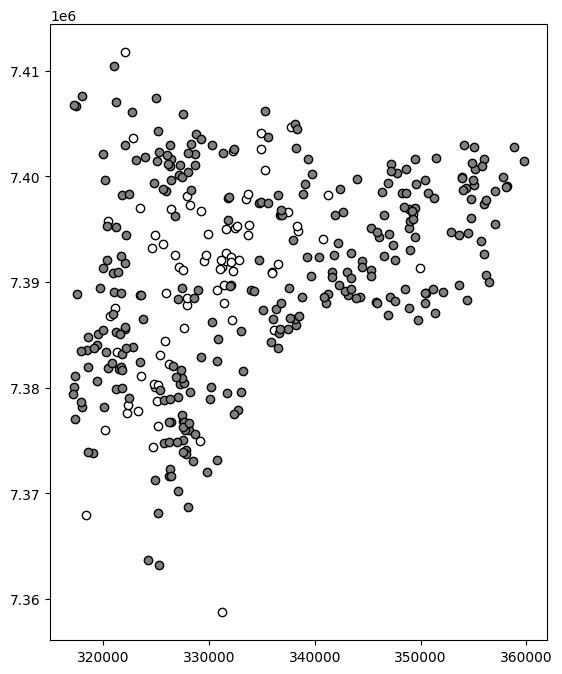

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
equip_esporte_clube.plot(ax = ax, color='white', edgecolor='k')
equip_esporte_clube_comunidade.plot(ax = ax, color='gray', edgecolor='k')
plt.plot()

In [15]:
equip_trab_empreend.columns

Index(['ad_enderec', 'ad_prog', 'ad_site', 'ad_unidade', 'ad_agenda',
       'ad_contato', 'ad_detalhe', 'ad_horario', 'geometry'],
      dtype='object')